Chessboard is 8x8

Knights have up to 8 possible moves

Moves cannot wrap around

Start position is random

Prob of move is uniform

A move only counts if it is valid

In [8]:
import numpy as np

In [9]:
def makeMove(position):
    """
    Carries out one random move, augmenting position
    Also checks if move is valid, could preprocess to not have a while loop but hurts readability and shouldn't impact performance much
    """
    
    while True:  # fight me
        choice_index = np.random.randint(0,8)
        potential_position = {
            0: (position[0]+1, position[1]+2),  # Right 1 Up 2
            1: (position[0]+1, position[1]-2),  # R1D2
            2: (position[0]-1, position[1]+2),  # L1U2
            3: (position[0]-1, position[1]-2),  # L1D2...
            4: (position[0]+2, position[1]+1),
            5: (position[0]+2, position[1]-1),
            6: (position[0]-2, position[1]+1),
            7: (position[0]-2, position[1]-1)
        }.get(choice_index)
        
        if potential_position[0] < 0 or potential_position[0] > 7 or potential_position[1] < 0 or potential_position[1] > 7:
            # if potential_position is out of range...
            pass  # ... nothing happens and the while loop continues
        else:
            # if in range...
            return potential_position  # ... position changes 

In [10]:
def simulateTrial():
    """
    Knight placed on random tile
    Carries out valid moves until returned to starting position
    Returns number of valid moves taken
    """
    move_count = 0
    start_pos = (np.random.randint(0,8), np.random.randint(0,8))
    current_pos = start_pos
    
    current_pos = makeMove(current_pos)  # initial move
    move_count += 1   
    
    while current_pos != start_pos:
        current_pos = makeMove(current_pos)
        move_count += 1
        
    return move_count

In [46]:
def simulate(n=1000, suppress=False, repeat=False):
    summ = 0
    
    if not repeat:
        summ = 0
        for _ in range(n):
            summ += simulateTrial()
        if not suppress:
            print(f"After {n} simulated trials the average number of moves is {summ / n}.")
        else:
            return summ / n
    else:
        running_totals = [0]*n  # list of trials
        averages = [0]*n
        
        running_totals[0] = simulateTrial()  # first trial
        
        for i in range(n-1):  # inductively work out rest
            running_totals[i+1] = running_totals[i] + simulateTrial()
            averages[i+1] = running_totals[i+1] / (i+1)  # total / number of trials
        
        return averages
    
    

In [47]:
simulate()

After 1000 simulated trials the average number of moves is 112.562.


## Data Viz...!

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
# may be a use case for generators but idk enough about them :(

def trialArray(iters=1000):
    lst = []
    for i in range(iters):
        lst.append(simulate(i+1, suppress=True))
    return lst

c:\users\will2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


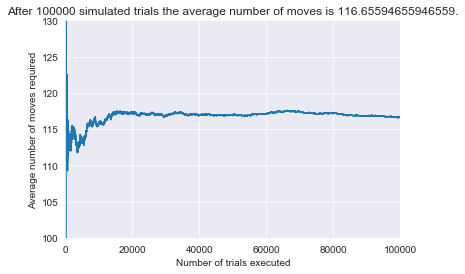

In [73]:
no_iters = 100000

lst = simulate(n=no_iters, repeat=True)

sns.set_style("darkgrid")
fig,ax = plt.subplots()
ax.plot(lst)
ax.set(title = f"After {no_iters} simulated trials the average number of moves is {lst[-1]}.", 
       ylabel = "Average number of moves required",
       xlabel = "Number of trials executed",
       xlim = [0, no_iters],
       ylim = [100, 130] )
       
fig.show()

In [74]:
fig.savefig("Knights.png")